# Demonstration of the TWIGA API and GNSS data

This demonstration call the TWIGA platform API
in order to retrieve meta-data on GNSS data
and to download some GNSS data
results are displayed in the notebook in both tables and graphs


June 2022

## Start by loading several python modules

These modules are packages used to add addtional functionality to python
for example the requests module is used so we can send requests to the TWIGA API
the pandas and numpy modules are used for gathering data in tables
the geopandas and contextily modules are used for displaying data on maps

In [13]:
# load modules
import requests
import json
import datetime
import base64
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as cx
from io import StringIO

## TWIGA API login
The following block logs us into the TWIGA API
By logging in to the API we receive a valid authentication key (token)
This token is needed in all other request we will do to the API

In [14]:
# HydroNET API URLs
api_login = "https://login.hydronet.com/auth/realms/hydronet/protocol/openid-connect/token"
api = "https://hnapi.hydronet.com/api/"

# Read API client id and secret from local file
with open("hn4_api_clientid_twiga.json") as json_file:
    hn4_api = json.load(json_file)
    client_id = hn4_api['client_id']
    client_secret = hn4_api['client_secret']

# Fetch a valid token from the login 
authorization = base64.b64encode(bytes(client_id + ":" + client_secret, "ISO-8859-1")).decode("ascii")
headers = {
    "Authorization": f"Basic {authorization}",
    "Content-Type": "application/x-www-form-urlencoded"
}
body = { "grant_type": "client_credentials" }
response = requests.post(api_login, data = body, headers = headers)
hn4_api_token = response.json().get('access_token')

# prepare a header with the valid token for subsequent requests
api_header = {'content-type': 'application/json', 'Authorization': 'bearer ' + hn4_api_token}

## Query the meta-data

The following code blocks are used to extract meta-data from the API
We check what data is available (locations, period, etc.)

In [15]:
#############################
# Query meta-data           #
#############################


# define the selected data source of interest, i.e. the SAWS raingauges
selected_datasource_code = "Gnss.Stations"

# json request to ask metadata of the selected datasource
request_metadata = {
     "DataSourceCodes": [selected_datasource_code]
}

# Send the request to the datasources endpoint of the API - which can be used to extract the start and end-date
gnss_metadata_datasource = requests.post(api + 'entity/datasources/get', headers=api_header, data=json.dumps(request_metadata))
gnss_metadata_datasource = gnss_metadata_datasource.json()

# Send the request to the variables endpoint of the API - to get all available variables
gnss_metadata_variables = requests.post(api + 'entity/variables/get', headers=api_header, data=json.dumps(request_metadata))
gnss_metadata_variables = gnss_metadata_variables.json()

# Send the request to the locations endpoint of the API - to get all locations
gnss_metadata_locations = requests.post(api + 'entity/locations/get', headers=api_header, data=json.dumps(request_metadata))
gnss_metadata_locations = gnss_metadata_locations.json()

In [16]:
# create data frame with all variables
df_var = pd.DataFrame.from_dict(gnss_metadata_variables['Variables'])
df_var.transpose()

,Name,Code,UnitCode,State
GE,East Gradient,GE,mm,1
GN,North Gradient,GN,mm,1
ZTD,Zenith Total Delay,ZTD,m,1
ZWD,Zenith Wet Delay,ZWD,m,1


In [17]:
# create data frame with all locations
df_loc = pd.DataFrame.from_dict(gnss_metadata_locations['Locations'])
# tranpose to get locations as rows
df_loc = df_loc.transpose()
df_loc

,Identifier,LocationId,Name,Code,X,Y,Z,Tags,ProjectionId,DataSourceGroupCode
Gnss.Stations#SUTM,Gnss.Stations#SUTM,24600,SUTM00ZAF,SUTM,20.810914,-32.381431,1761.321,[],3,Gnss.Stations
Gnss.Stations#CTWN,Gnss.Stations#CTWN,24601,CTWN00ZAF,CTWN,18.468553,-33.951432,51.871,[],3,Gnss.Stations
Gnss.Stations#DAKR,Gnss.Stations#DAKR,30684,DAKR00SEN,DAKR,-17.439463,14.721237,21.304,[],3,Gnss.Stations
Gnss.Stations#DJIG,Gnss.Stations#DJIG,30685,DJIG00DJI,DJIG,42.847064,11.526288,723.69,[],3,Gnss.Stations
Gnss.Stations#WIND,Gnss.Stations#WIND,30686,WIND00NAM,WIND,17.089435,-22.574917,1702.688,[],3,Gnss.Stations
Gnss.Stations#ACRG,Gnss.Stations#ACRG,30687,ACRG00GHA,ACRG,-0.207111,5.641477,58.641,[],3,Gnss.Stations
Gnss.Stations#MELI,Gnss.Stations#MELI,30689,MELI00ESP,MELI,-2.951649,35.281191,39.336,[],3,Gnss.Stations
Gnss.Stations#NKLG,Gnss.Stations#NKLG,30690,NKLG00GAB,NKLG,9.672129,0.35391,23.472,[],3,Gnss.Stations
Gnss.Stations#FUNC,Gnss.Stations#FUNC,30691,FUNC00PRT,FUNC,-16.907613,32.647951,31.309,[],3,Gnss.Stations
Gnss.Stations#HARB,Gnss.Stations#HARB,30692,HARB00ZAF,HARB,27.707248,-25.88696,1535.362,[],3,Gnss.Stations


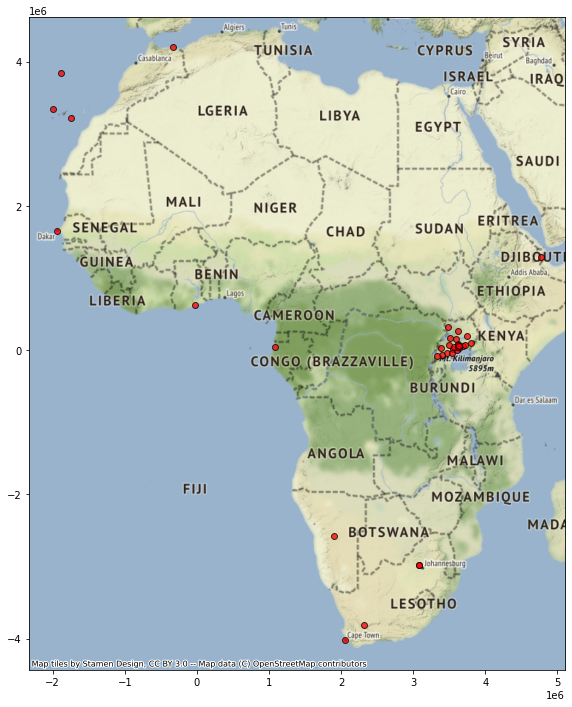

In [18]:
# We can also plot all the locations on a map
gdf_gnss = gpd.GeoDataFrame(df_loc, geometry = gpd.points_from_xy(df_loc.X, df_loc.Y))
gdf_gnss = gdf_gnss.set_crs(epsg=4326)
gdf_gnss = gdf_gnss.to_crs(epsg = 3857)

ax = gdf_gnss.plot(figsize=(10, 12), alpha = 0.75, edgecolor = 'k', color = 'red')
cx.add_basemap(ax)

In [19]:
# Query the available time-series of Zenith Total Delay in 2021
request_timeseriesinformations = {
     "DataSourceCodes": ["Gnss.Stations"],
     "VariableCodes": ["ZTD"],
     "StartDate": "20210101000000",
     "EndDate": "20220101000000"
}
gnss_metadata_tsinformation = requests.post(api + 'entity/timeseriesinformations/get', headers=api_header, data=json.dumps(request_timeseriesinformations))
gnss_metadata_tsinformation = gnss_metadata_tsinformation.json()

# create data frame with all locations which match the search criteria
df_ts = pd.DataFrame.from_dict(gnss_metadata_tsinformation['TimeSeriesInformations'])
df_ts.transpose()

,TimeSeriesInformationId,LocationIdentifier,DataSourceVariableId,StartDate,EndDate
95150,95150,Gnss.Stations#SUTM,28893,20190924235941,20220610074312
95151,95151,Gnss.Stations#CTWN,28893,20190924235942,20220610081442
112926,112926,Gnss.Stations#DAKR,28893,20200713235942,20210120155911
112927,112927,Gnss.Stations#DJIG,28893,20200715011842,20220609011142
112928,112928,Gnss.Stations#WIND,28893,20200715011312,20220610081442
112938,112938,Gnss.Stations#ACRG,28893,20200715011212,20210224065912
112994,112994,Gnss.Stations#MELI,28893,20200722235942,20220610081442
112995,112995,Gnss.Stations#NKLG,28893,20200722235942,20220610081442
113002,113002,Gnss.Stations#FUNC,28893,20200722121042,20220610081442
113003,113003,Gnss.Stations#HARB,28893,20200722121042,20220610081442


In [20]:
# Download data of 2 locations in a simple CSV format
request_data_timeseries = {
    "Readers": [{
    "DataSourceCode": "Gnss.Stations",
        "Settings": {
            "StartDate": "20210101000000",
            "EndDate": "20210102000000",
            "VariableCodes": ["ZTD"],
            "LocationCodes": ["SUTM", "CTWN"]
        }
    }],
    "Exporter": {
        "DataFormatCode": "hydronet.csv.simple"
    },
    "TimeZoneOffset": "+0000"
}

gnss_data = requests.post(api + 'timeseries/get', headers=api_header, data=json.dumps(request_data_timeseries))
# parse the csv data into a pandas dataframe
gnss_data_txt = StringIO(gnss_data.text)
gnss_df = pd.read_csv(gnss_data_txt)

# Drop last row and column (as those are empty)
gnss_df.drop(gnss_df.tail(1).index, inplace = True)
gnss_df = gnss_df.iloc[:, :-1]
gnss_df

,ï»¿Date time,Location code,Variable code,Value,Quality,Availability
0,2021-01-01 00:00:12,SUTM,ZTD,1.8931,NaN,1.0
1,2021-01-01 00:00:42,SUTM,ZTD,1.8930,NaN,1.0
2,2021-01-01 00:01:12,SUTM,ZTD,1.8929,NaN,1.0
3,2021-01-01 00:01:42,SUTM,ZTD,1.8929,NaN,1.0
4,2021-01-01 00:02:12,SUTM,ZTD,1.8928,NaN,1.0
...,...,...,...,...,...,...
4734,2021-01-01 23:57:42,CTWN,ZTD,2.3584,NaN,1.0
4735,2021-01-01 23:58:12,CTWN,ZTD,2.3582,NaN,1.0
4736,2021-01-01 23:58:42,CTWN,ZTD,2.3579,NaN,1.0
4737,2021-01-01 23:59:12,CTWN,ZTD,2.3576,NaN,1.0


# Data of Uganda

In [21]:
# Filter the locations dataframe for all locations in Uganda using coordinates
df_loc_tp = df_loc
df_uganda = df_loc_tp[(df_loc_tp['X']>=29.4928) & (df_loc_tp['X']<=35.0848) & 
                      (df_loc_tp['Y']>=-1.532) & (df_loc_tp['Y']<=4.3194)]
# display results
df_uganda

,Identifier,LocationId,Name,Code,X,Y,Z,Tags,ProjectionId,DataSourceGroupCode,geometry
Gnss.Stations#arua,Gnss.Stations#arua,117357,ARUA,arua,31.221028,2.881693,686.629,[],3,Gnss.Stations,POINT (31.22103 2.88169)
Gnss.Stations#gomb,Gnss.Stations#gomb,117358,GOMB,gomb,31.922315,0.174396,1222.656,[],3,Gnss.Stations,POINT (31.92231 0.17440)
Gnss.Stations#kamw,Gnss.Stations#kamw,117359,KAMW,kamw,30.445414,0.254451,1298.008,[],3,Gnss.Stations,POINT (30.44541 0.25445)
Gnss.Stations#hoim,Gnss.Stations#hoim,117360,HOIM,hoim,31.471315,1.485878,1142.522,[],3,Gnss.Stations,POINT (31.47131 1.48588)
Gnss.Stations#jja2,Gnss.Stations#jja2,117361,JJA2,jja2,33.154125,0.524719,1189.585,[],3,Gnss.Stations,POINT (33.15412 0.52472)
Gnss.Stations#kla1,Gnss.Stations#kla1,117362,KLA1,kla1,32.585372,0.314267,1209.509,[],3,Gnss.Stations,POINT (32.58537 0.31427)
Gnss.Stations#luw1,Gnss.Stations#luw1,117363,LUW1,luw1,32.514031,0.706262,1161.72,[],3,Gnss.Stations,POINT (32.51403 0.70626)
Gnss.Stations#lyat,Gnss.Stations#lyat,117364,LYAT,lyat,31.144341,-0.416031,1260.829,[],3,Gnss.Stations,POINT (31.14434 -0.41603)
Gnss.Stations#mble,Gnss.Stations#mble,117365,MBLE,mble,34.161052,0.924462,1161.951,[],3,Gnss.Stations,POINT (34.16105 0.92446)
Gnss.Stations#mbra,Gnss.Stations#mbra,117366,MBRA,mbra,30.504676,-0.64538,1455.374,[],3,Gnss.Stations,POINT (30.50468 -0.64538)


In [23]:
# Query the available time-series of Zenith Total Delay for the stations in Uganda
request_timeseriesinformations_ugdana_ztd = {
     "DataSourceCodes": ["Gnss.Stations"],
     "VariableCodes": ["ZTD"],
     "LocationCodes": df_uganda['Code'].tolist()
}
gnss_metadata_tsinformation_uganda = requests.post(api + 'entity/timeseriesinformations/get', headers=api_header, data=json.dumps(request_timeseriesinformations_ugdana_ztd))
gnss_metadata_tsinformation_uganda = gnss_metadata_tsinformation_uganda.json()

# create data frame with all locations which match the search criteria
df_ts_uganda = pd.DataFrame.from_dict(gnss_metadata_tsinformation_uganda['TimeSeriesInformations'])
# rotate table
df_ts_uganda = df_ts_uganda.transpose()

# display table
df_ts_uganda

,TimeSeriesInformationId,LocationIdentifier,DataSourceVariableId,StartDate,EndDate
95150,95150,Gnss.Stations#SUTM,28893,20190924235941,20220610074312
95151,95151,Gnss.Stations#CTWN,28893,20190924235942,20220610081442
112926,112926,Gnss.Stations#DAKR,28893,20200713235942,20210120155911
112927,112927,Gnss.Stations#DJIG,28893,20200715011842,20220609011142
112928,112928,Gnss.Stations#WIND,28893,20200715011312,20220610081442
112938,112938,Gnss.Stations#ACRG,28893,20200715011212,20210224065912
112994,112994,Gnss.Stations#MELI,28893,20200722235942,20220610081442
112995,112995,Gnss.Stations#NKLG,28893,20200722235942,20220610081442
113002,113002,Gnss.Stations#FUNC,28893,20200722121042,20220610081442
113003,113003,Gnss.Stations#HARB,28893,20200722121042,20220610081442


In [24]:
# Download data of uganda stations
# start and end time are formatted as yyyyMMddHHmmss expected to be in UTC
request_data_timeseries_uganda_ztd = {
    "Readers": [{
    "DataSourceCode": "Gnss.Stations",
        "Settings": {
            "StartDate": "20210101000000",
            "EndDate": "20210102000000",
            "VariableCodes": ["ZTD"],
            "LocationCodes": df_uganda['Code'].tolist()
        }
    }],
    "Exporter": {
        "DataFormatCode": "hydronet.csv.simple"
    },
    "TimeZoneOffset": "+0000"
}

gnss_data_uganda = requests.post(api + 'timeseries/get', headers=api_header, data=json.dumps(request_data_timeseries_uganda_ztd))
# parse the csv data into a pandas dataframe
gnss_data_txt_uganda = StringIO(gnss_data_uganda.text)
gnss_df_uganda = pd.read_csv(gnss_data_txt_uganda)

# Drop last row and column (as those are empty)
gnss_df_uganda.drop(gnss_df_uganda.tail(1).index, inplace = True)
gnss_df_uganda = gnss_df_uganda.iloc[:, :-1]
# rename first column
gnss_df_uganda = gnss_df_uganda.rename(columns={gnss_df_uganda.columns[0]: 'DateTime'})
# Omit quality and availabilyt columns
gnss_df_uganda = gnss_df_uganda[gnss_df_uganda['Availability'] == 1].drop('Availability',axis=1).drop('Quality',axis=1)

# Display results
gnss_df_uganda

,DateTime,Location code,Variable code,Value
0,2021-01-01 00:00:12,gomb,ZTD,2.2270
1,2021-01-01 00:00:42,gomb,ZTD,2.2273
2,2021-01-01 00:01:12,gomb,ZTD,2.2277
3,2021-01-01 00:01:42,gomb,ZTD,2.2276
4,2021-01-01 00:02:12,gomb,ZTD,2.2275
...,...,...,...,...
37270,2021-01-01 23:57:42,tw05,ZTD,NaN
37271,2021-01-01 23:58:12,tw05,ZTD,NaN
37272,2021-01-01 23:58:42,tw05,ZTD,NaN
37273,2021-01-01 23:59:12,tw05,ZTD,NaN


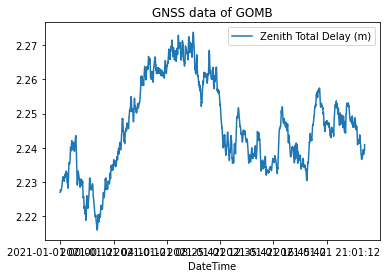

In [25]:
# plot timeseries of the location 'gomb'
# select the data of gomb
gnss_gomb = gnss_df_uganda[gnss_df_uganda['Location code'] == 'gomb']
gnss_gomb.set_index('DateTime', inplace=True) 
# build the plot
ax = gnss_gomb.plot(title = "GNSS data of GOMB")
ax.legend(["Zenith Total Delay (m)"])